# Preparação dos Dados - E-commerce Brasileiro

Este notebook contém a preparação inicial dos dados do e-commerce brasileiro (Olist) para análise.

## Objetivos:
1. Carregar os dados
2. Análise inicial da estrutura
3. Limpeza e preparação
4. Exportação para MySQL

## Data: 15/01/2025


In [2]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from datetime import datetime

# Configurações de visualização
plt.style.use('default')  # Mudamos de 'seaborn' para 'default'
pd.set_option('display.max_columns', None)
print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [ ]:
# Carregamento dos Dados
import os

# Caminho para a pasta de dados
data_path = os.path.join('..', 'data', 'raw')

# Definindo os arquivos que vamos usar
datasets = {
    'orders': 'olist_orders_dataset.csv',
    'customers': 'olist_customers_dataset.csv',
    'products': 'olist_products_dataset.csv',
    'order_items': 'olist_order_items_dataset.csv'
}

# Criando dicionário para armazenar os DataFrames
dfs = {}

# Carregamento dos dados
for name, file in datasets.items():
    print(f"Carregando {name}...")
    file_path = os.path.join(data_path, file)
    dfs[name] = pd.read_csv(file_path)
    
print("\nDados carregados com sucesso!")

Carregando orders...
Carregando customers...
Carregando products...
Carregando order_items...

Dados carregados com sucesso!


In [5]:
# Verificação Inicial
# Vamos examinar cada dataset
for name, df in dfs.items():
    print(f"\nDataset: {name}")
    print("-" * 50)
    print(f"Dimensões: {df.shape}")
    print("\nPrimeiras 3 linhas:")
    print(df.head(3))
    print("\nInformações da estrutura:")
    print(df.info())


Dataset: orders
--------------------------------------------------
Dimensões: (99441, 8)

Primeiras 3 linhas:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           20

# Análise Inicial dos Dados

Verificamos que temos:
1. Orders: 99,441 pedidos
   - Contém informações de status, datas de compra e entrega
   - Principais colunas: order_id, customer_id, order_status, datas

2. Vamos analisar o status dos pedidos e as datas


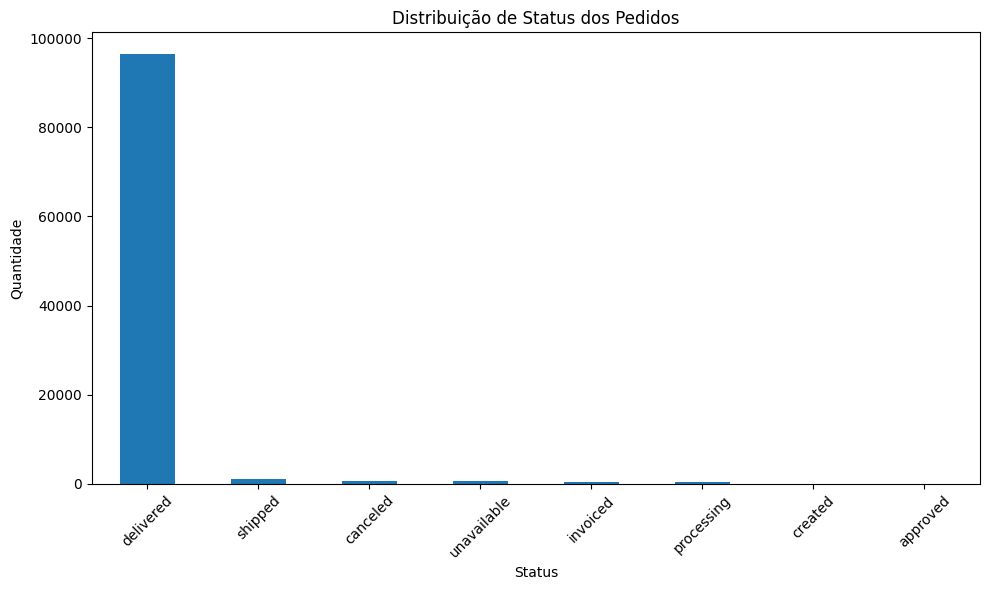


Percentual por status:
order_status
delivered      97.02
shipped         1.11
canceled        0.63
unavailable     0.61
invoiced        0.32
processing      0.30
created         0.01
approved        0.00
Name: count, dtype: float64


In [6]:
# Análise de Status dos Pedidos
# Análise de status
status_count = dfs['orders']['order_status'].value_counts()

# Criando gráfico
plt.figure(figsize=(10, 6))
status_count.plot(kind='bar')
plt.title('Distribuição de Status dos Pedidos')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrando percentuais
print("\nPercentual por status:")
print((status_count / len(dfs['orders']) * 100).round(2))

C:\Users\ADM\AppData\Local\Temp\ipykernel_10856\3020861981.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pedidos_por_mes = dfs['orders'].set_index('order_purchase_timestamp')\


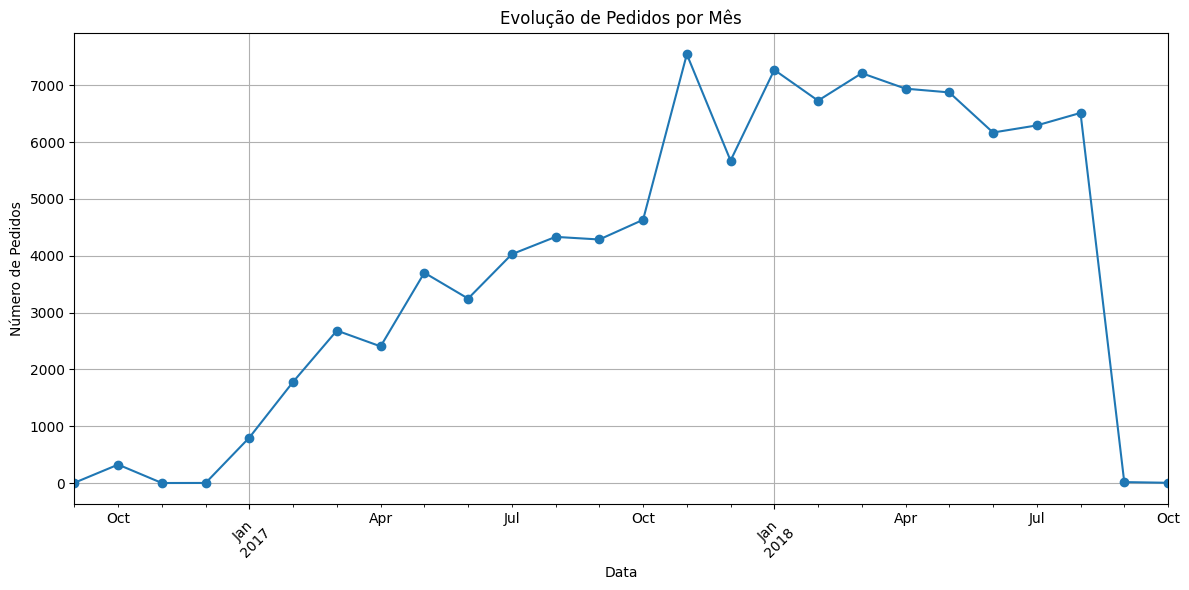


Estatísticas mensais:
count      26.00
mean     3824.65
std      2758.01
min         0.00
25%      1045.00
50%      4155.50
75%      6457.00
max      7544.00
Name: order_id, dtype: float64


In [7]:
# Análise Temporal
# Convertendo colunas de data
dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp'])

# Análise por mês
pedidos_por_mes = dfs['orders'].set_index('order_purchase_timestamp')\
    .resample('M')['order_id'].count()

# Gráfico de pedidos por mês
plt.figure(figsize=(12, 6))
pedidos_por_mes.plot(kind='line', marker='o')
plt.title('Evolução de Pedidos por Mês')
plt.xlabel('Data')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estatísticas mensais
print("\nEstatísticas mensais:")
print(pedidos_por_mes.describe().round(2))

## Insights Iniciais

### Status dos Pedidos
1. **Alta Taxa de Entrega**: 97.02% dos pedidos foram entregues com sucesso
2. **Baixo Cancelamento**: Apenas 0.63% dos pedidos foram cancelados
3. **Pedidos em Processo**: Aproximadamente 1.73% dos pedidos estão em diferentes estágios de processamento (shipped, processing, created, approved)

### Evolução Temporal
1. **Crescimento**: Observa-se uma tendência de crescimento de Out/2017 até início de 2018
2. **Pico**: Maior volume em Jan/2018 com aproximadamente 7.544 pedidos
3. **Média**: ~3.825 pedidos por mês
4. **Variabilidade**: Desvio padrão de 2.758 pedidos, indicando alta variação mensal

### Próximos Passos de Análise
1. Investigar tempo médio de entrega
2. Analisar distribuição geográfica dos pedidos
3. Examinar relação entre valor do pedido e tempo de entrega


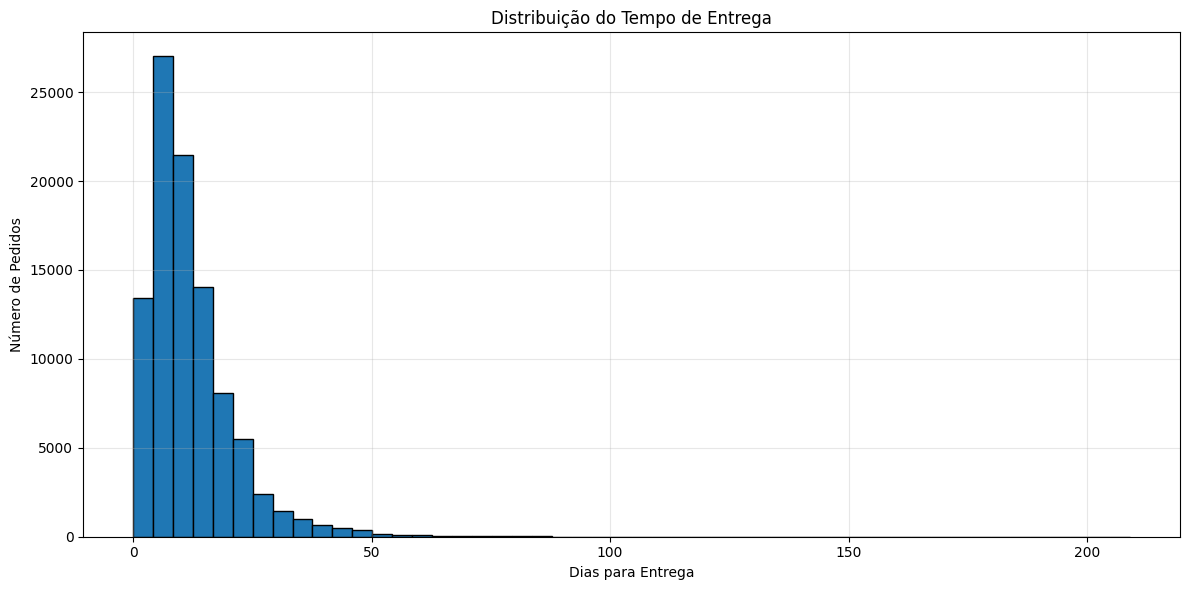


Estatísticas do Tempo de Entrega (em dias):
count    96470.00
mean        12.09
std          9.55
min          0.00
25%          6.00
50%         10.00
75%         15.00
max        209.00
Name: delivery_time, dtype: float64


In [8]:
# Análise de Tempo de Entrega
# Calculando tempo de entrega em dias
dfs['orders']['delivery_time'] = (pd.to_datetime(dfs['orders']['order_delivered_customer_date']) - 
                                pd.to_datetime(dfs['orders']['order_purchase_timestamp'])).dt.days

# Filtrando apenas pedidos entregues e com tempo de entrega válido
delivery_times = dfs['orders'][dfs['orders']['order_status'] == 'delivered']['delivery_time'].dropna()

# Criando histograma
plt.figure(figsize=(12, 6))
plt.hist(delivery_times, bins=50, edgecolor='black')
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Dias para Entrega')
plt.ylabel('Número de Pedidos')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estatísticas de entrega
print("\nEstatísticas do Tempo de Entrega (em dias):")
print(delivery_times.describe().round(2))

## Análise do Tempo de Entrega

### Principais Insights
1. **Tempo Médio**: 12.09 dias para entrega
2. **Mediana**: 10 dias (50% dos pedidos)
3. **Distribuição**:
   - 25% das entregas: até 6 dias
   - 75% das entregas: até 15 dias
   - Alguns casos extremos chegando a 209 dias

### Pontos de Atenção
1. Existe uma grande concentração de entregas entre 5-15 dias
2. Há outliers significativos (entregas muito longas)
3. Alguns pedidos com entrega no mesmo dia (min = 0)

### Preparação para MySQL
Vamos preparar os dados considerando:
1. Limpeza de valores nulos
2. Formatação de datas
3. Estruturação das tabelas relacionais

In [9]:
# Preparação para MySQL
# Função para limpar e preparar dados
def prepare_table_for_mysql(df, table_name):
    # Cópia para não modificar original
    df_clean = df.copy()
    
    # Convertendo datas para formato MySQL
    date_columns = df_clean.select_dtypes(include=['datetime64']).columns
    for col in date_columns:
        df_clean[col] = df_clean[col].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # Removendo caracteres especiais de strings
    str_columns = df_clean.select_dtypes(include=['object']).columns
    for col in str_columns:
        df_clean[col] = df_clean[col].str.replace('"', '')
        df_clean[col] = df_clean[col].str.replace("'", "")
    
    # Substituindo NaN por NULL
    df_clean = df_clean.replace({np.nan: None})
    
    return df_clean

# Preparando cada tabela
tables_mysql = {}
for name, df in dfs.items():
    print(f"Preparando tabela {name}...")
    tables_mysql[name] = prepare_table_for_mysql(df, name)
    
print("\nTabelas preparadas para MySQL!")

# Verificando estrutura final
for name, df in tables_mysql.items():
    print(f"\nEstrutura da tabela {name}:")
    print(df.info())

Preparando tabela orders...
Preparando tabela customers...
Preparando tabela products...
Preparando tabela order_items...

Tabelas preparadas para MySQL!

Estrutura da tabela orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   delivery_time                  96476 non-null  object
dtypes: object(9)
memory usage: 6.8+ MB
None

Estrutura da t

In [10]:
# Geração dos comandos SQL
sql_commands = """
-- Criação do banco de dados
CREATE DATABASE IF NOT EXISTS olist_ecommerce;
USE olist_ecommerce;

-- Tabela de Clientes
CREATE TABLE IF NOT EXISTS customers (
    customer_id VARCHAR(50) PRIMARY KEY,
    customer_unique_id VARCHAR(50) NOT NULL,
    customer_zip_code_prefix VARCHAR(10),
    customer_city VARCHAR(100),
    customer_state CHAR(2)
);

-- Tabela de Produtos
CREATE TABLE IF NOT EXISTS products (
    product_id VARCHAR(50) PRIMARY KEY,
    product_category_name VARCHAR(100),
    product_name_length INT,
    product_description_length INT,
    product_photos_qty INT,
    product_weight_g INT,
    product_length_cm INT,
    product_height_cm INT,
    product_width_cm INT
);

-- Tabela de Pedidos
CREATE TABLE IF NOT EXISTS orders (
    order_id VARCHAR(50) PRIMARY KEY,
    customer_id VARCHAR(50),
    order_status VARCHAR(20),
    order_purchase_timestamp DATETIME,
    order_approved_at DATETIME,
    order_delivered_carrier_date DATETIME,
    order_delivered_customer_date DATETIME,
    order_estimated_delivery_date DATETIME,
    delivery_time INT,
    FOREIGN KEY (customer_id) REFERENCES customers(customer_id)
);

-- Tabela de Itens do Pedido
CREATE TABLE IF NOT EXISTS order_items (
    order_id VARCHAR(50),
    order_item_id INT,
    product_id VARCHAR(50),
    seller_id VARCHAR(50),
    shipping_limit_date DATETIME,
    price DECIMAL(10,2),
    freight_value DECIMAL(10,2),
    PRIMARY KEY (order_id, order_item_id),
    FOREIGN KEY (order_id) REFERENCES orders(order_id),
    FOREIGN KEY (product_id) REFERENCES products(product_id)
);
"""

# Salvando os comandos SQL em um arquivo
with open('../sql/create_tables.sql', 'w') as f:
    f.write(sql_commands)

print("Comandos SQL gerados e salvos em 'sql/create_tables.sql'")

Comandos SQL gerados e salvos em 'sql/create_tables.sql'
